In [48]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
data = pd.read_csv("7-9/brunhild.txt", sep='\t')

In [50]:
data2 = pd.read_csv("7-10/physical.txt", sep='\t')

In [51]:
data

,Hours,Sulfate
0,2,15.11
1,4,11.36
2,6,9.77
3,8,9.09
4,10,8.48
5,15,7.69
6,20,7.33
7,25,7.06
8,30,6.70
9,40,6.43


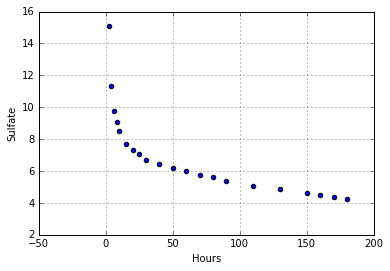

In [52]:
data.plot(kind='scatter', x='Hours', y='Sulfate')
plt.grid()

In [53]:
data_log = pd.DataFrame({'Hours':np.log(data["Hours"])/np.log(2), 'Sulfate':np.log(data["Sulfate"])/np.log(2)})

In [54]:
data_log

,Hours,Sulfate
0,1.000000,3.917432
1,2.000000,3.505891
2,2.584963,3.288359
3,3.000000,3.184280
4,3.321928,3.084064
5,3.906891,2.942984
6,4.321928,2.873813
7,4.643856,2.819668
8,4.906891,2.744161
9,5.321928,2.684819


# Find the parameters

In [55]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sulfate ~ Hours', data=data_log).fit()
lm.params

Intercept    3.990259
Hours       -0.247046
dtype: float64

# Plotting the regression line in log-log coordinates.

In [56]:
Hours_new = pd.DataFrame({'Hours':[data_log.Hours.min(), data_log.Hours.max()]})
Hours_new

,Hours
0,1.000000
1,7.491853


In [57]:
preds = lm.predict(Hours_new)
preds

array([ 3.74321304,  2.13942573])

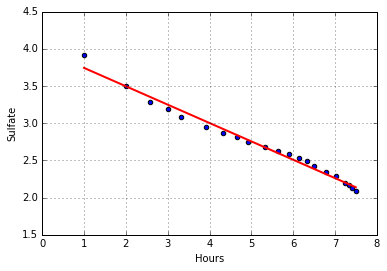

In [58]:
data_log.plot(kind='scatter', x='Hours', y='Sulfate')
plt.plot(Hours_new, preds, c='red', linewidth=2)
plt.grid()

# Plotting the regression curve in original coordinates

In [59]:
#Hours_original = pd.DataFrame({'Hours':data.Hours})
preds_original = lm.predict(pd.DataFrame(data_log["Hours"]))
preds_original = np.exp2(preds_original)
preds_original

array([ 13.39119716,  11.28368889,  10.20818274,   9.50786052,
         8.99790817,   8.14027149,   7.58181626,   7.17516694,
         6.85915455,   6.38858908,   6.04593827,   5.77965995,
         5.56369534,   5.38315213,   5.22877097,   4.97587549,
         4.77470057,   4.60885177,   4.53595098,   4.46852189,   4.40586635])

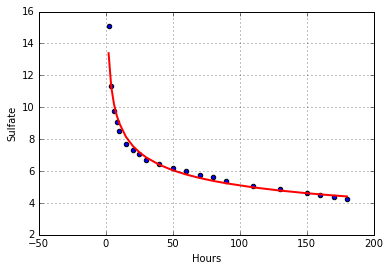

In [60]:
data.plot(kind='scatter', x='Hours', y='Sulfate')
plt.plot(Hours_original, preds_original, c='red', linewidth=2)
plt.grid()

# Plot the residual against the fitted values in log-log coordinates.

In [61]:
x_axis = lm.predict(pd.DataFrame(data_log.Hours))
x_axis

array([ 3.74321304,  3.49616689,  3.35165416,  3.24912074,  3.16958964,
        3.02507691,  2.92254349,  2.8430124 ,  2.77803076,  2.67549735,
        2.59596625,  2.53098461,  2.47604342,  2.4284512 ,  2.38647188,
        2.31495039,  2.25541026,  2.20440737,  2.18140505,  2.15979769,
        2.13942573])

In [62]:
y_axis = np.array(data_log.Sulfate - x_axis)
y_axis

array([ 0.17421872,  0.00972404, -0.06329559, -0.06484045, -0.08552538,
       -0.08209331, -0.0487303 , -0.02334422, -0.03386967,  0.00932139,
        0.0269641 ,  0.05157139,  0.0525279 ,  0.06724397,  0.04381339,
        0.03271527,  0.02851151, -0.00277351, -0.01148005, -0.03546956,
       -0.04518966])

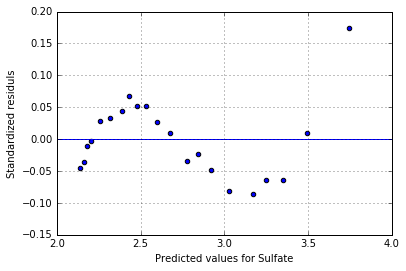

In [63]:
plt.scatter(x_axis, y_axis)
plt.xlabel("Predicted values for Sulfate")
plt.ylabel("Standardized residuls")
plt.axhline(0)
plt.grid()

# Plot the residual against the fitted values in original coordinates.

In [64]:
x_axis = preds_original
y_axis = np.array(data.Sulfate - x_axis)
y_axis

array([ 1.71880284,  0.07631111, -0.43818274, -0.41786052, -0.51790817,
       -0.45027149, -0.25181626, -0.11516694, -0.15915455,  0.04141092,
        0.11406173,  0.21034005,  0.20630466,  0.25684787,  0.16122903,
        0.11412451,  0.09529943, -0.00885177, -0.03595098, -0.10852189,
       -0.13586635])

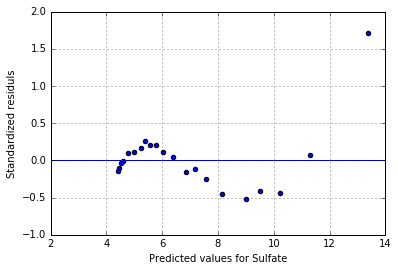

In [65]:
plt.scatter(x_axis, y_axis)
plt.xlabel("Predicted values for Sulfate")
plt.ylabel("Standardized residuls")
plt.axhline(0)
plt.grid()

In [66]:
data2

,Mass,Fore,Bicep,Chest,Neck,Shoulder,Waist,Height,Calf,Thigh,Head
0,77.0,28.5,33.5,100.0,38.5,114.0,85.0,178.0,37.5,53.0,58.0
1,85.5,29.5,36.5,107.0,39.0,119.0,90.5,187.0,40.0,52.0,59.0
2,63.0,25.0,31.0,94.0,36.5,102.0,80.5,175.0,33.0,49.0,57.0
3,80.5,28.5,34.0,104.0,39.0,114.0,91.5,183.0,38.0,50.0,60.0
4,79.5,28.5,36.5,107.0,39.0,114.0,92.0,174.0,40.0,53.0,59.0
5,94.0,30.5,38.0,112.0,39.0,121.0,101.0,180.0,39.5,57.5,59.0
6,66.0,26.5,29.0,93.0,35.0,105.0,76.0,177.5,38.5,50.0,58.5
7,69.0,27.0,31.0,95.0,37.0,108.0,84.0,182.5,36.0,49.0,60.0
8,65.0,26.5,29.0,93.0,35.0,112.0,74.0,178.5,34.0,47.0,55.5
9,58.0,26.5,31.0,96.0,35.0,103.0,76.0,168.5,35.0,46.0,58.0


In [67]:
lm2 = smf.ols(formula='Mass ~ Fore + Bicep + Chest + Neck + Shoulder + Waist + Height + Calf + Thigh + Head', data=data2).fit()
lm2.params

Intercept   -69.517135
Fore          1.781819
Bicep         0.155090
Chest         0.189135
Neck         -0.481837
Shoulder     -0.029312
Waist         0.661441
Height        0.317846
Calf          0.445890
Thigh         0.297212
Head         -0.919563
dtype: float64

In [68]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Mass   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     47.17
Date:                Mon, 06 Mar 2017   Prob (F-statistic):           1.41e-07
Time:                        19:24:14   Log-Likelihood:                -41.789
No. Observations:                  22   AIC:                             105.6
Df Residuals:                      11   BIC:                             117.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -69.5171     29.037     -2.394      0.036      -133.428    -5.606
Fore           1.7818      0.855      2.085      0.061        -0.099     3.663
Bicep          0.1551      0.485      0.320      0.755        -0.913     1.223
Chest          0.1891      0.226      0.838      0.420        -0.308     0.686
Neck          -0.4818      0.721     -0.669      0.518        -2.068     1.104
Shoulder      -0.0293      0.239     -0.122      0.905        -0.556     0.498
Waist          0.6614      0.116      5.679      0.000         0.405     0.918
Height         0.3178      0.130      2.438      0.033         0.031     0.605
Calf           0.4459      0.413      1.081      0.303        -0.462     1.354
Thigh          0.2972      0.305      0.974      0.351        -0.374     0.969
Head          -0.9196      0.520     -1.768      0.105        -2.064     0.225
==============================================================================
Omnibus:                        1.829   Durbin-Watson:                   1.625
Prob(Omnibus):                  0.401   Jarque-Bera (JB):                0.991
Skew:                           0.519   Prob(JB):                        0.609
Kurtosis:                       3.073   Cond. No.                     1.60e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
features = data2.drop(['Mass'], axis=1)

In [70]:
Mass_predicted = lm2.predict(features)
Mass_predicted

array([ 75.41910814,  84.99916116,  62.76980909,  79.3930597 ,
        80.52127459,  94.03259848,  64.76643423,  69.38366451,
        63.416757  ,  60.55234445,  70.4220923 ,  72.48721443,
        75.6461613 ,  70.10536813,  82.32971607,  66.83032498,
        53.62109325,  64.89798085,  83.8752733 ,  70.59230182,
        84.82811752,  95.61014467])

In [71]:
x_axis = Mass_predicted
y_axis = np.array(data2.Mass - Mass_predicted)
y_axis

array([ 1.58089186,  0.50083884,  0.23019091,  1.1069403 , -1.02127459,
       -0.03259848,  1.23356577, -0.38366451,  1.583243  , -2.55234445,
       -0.9220923 ,  0.51278557, -1.6461613 , -2.10536813, -2.32971607,
       -0.83032498,  0.87890675, -0.89798085,  0.1247267 ,  2.40769818,
        4.17188248, -1.61014467])

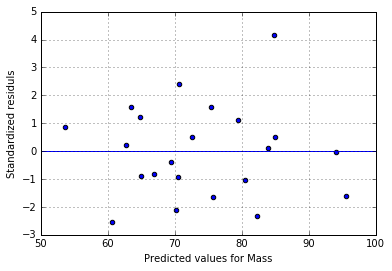

In [72]:
plt.scatter(x_axis, y_axis)
plt.xlabel("Predicted values for Mass")
plt.ylabel("Standardized residuls")
plt.axhline(0)
plt.grid()

# Regress the cube root of mass against these diameters

In [73]:
data_cubed = pd.DataFrame({'Mass': data2.Mass**(1./3.)})
data_cubed = pd.concat([data_cubed, features], axis=1)

In [74]:
data_cubed

,Mass,Fore,Bicep,Chest,Neck,Shoulder,Waist,Height,Calf,Thigh,Head
0,4.254321,28.5,33.5,100.0,38.5,114.0,85.0,178.0,37.5,53.0,58.0
1,4.405434,29.5,36.5,107.0,39.0,119.0,90.5,187.0,40.0,52.0,59.0
2,3.979057,25.0,31.0,94.0,36.5,102.0,80.5,175.0,33.0,49.0,57.0
3,4.317828,28.5,34.0,104.0,39.0,114.0,91.5,183.0,38.0,50.0,60.0
4,4.299874,28.5,36.5,107.0,39.0,114.0,92.0,174.0,40.0,53.0,59.0
5,4.546836,30.5,38.0,112.0,39.0,121.0,101.0,180.0,39.5,57.5,59.0
6,4.041240,26.5,29.0,93.0,35.0,105.0,76.0,177.5,38.5,50.0,58.5
7,4.101566,27.0,31.0,95.0,37.0,108.0,84.0,182.5,36.0,49.0,60.0
8,4.020726,26.5,29.0,93.0,35.0,112.0,74.0,178.5,34.0,47.0,55.5
9,3.870877,26.5,31.0,96.0,35.0,103.0,76.0,168.5,35.0,46.0,58.0


In [75]:
lm_cubed = smf.ols(formula='Mass ~ Fore + Bicep + Chest + Neck + \
Shoulder + Waist + Height + Calf + Thigh + Head', data=data_cubed).fit()
lm_cubed.params

Intercept    1.119229
Fore         0.027972
Bicep        0.004144
Chest        0.001052
Neck        -0.002532
Shoulder     0.000810
Waist        0.011152
Height       0.005774
Calf         0.010656
Thigh        0.007919
Head        -0.012452
dtype: float64

In [76]:
lm_cubed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Mass   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     44.44
Date:                Mon, 06 Mar 2017   Prob (F-statistic):           1.93e-07
Time:                        19:24:15   Log-Likelihood:                 44.910
No. Observations:                  22   AIC:                            -67.82
Df Residuals:                      11   BIC:                            -55.82
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.1192      0.564      1.984      0.073        -0.123     2.361
Fore           0.0280      0.017      1.684      0.120        -0.009     0.065
Bicep          0.0041      0.009      0.439      0.669        -0.017     0.025
Chest          0.0011      0.004      0.240      0.815        -0.009     0.011
Neck          -0.0025      0.014     -0.181      0.860        -0.033     0.028
Shoulder       0.0008      0.005      0.174      0.865        -0.009     0.011
Waist          0.0112      0.002      4.927      0.000         0.006     0.016
Height         0.0058      0.003      2.279      0.044         0.000     0.011
Calf           0.0107      0.008      1.329      0.211        -0.007     0.028
Thigh          0.0079      0.006      1.336      0.209        -0.005     0.021
Head          -0.0125      0.010     -1.232      0.244        -0.035     0.010
==============================================================================
Omnibus:                        2.722   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.256   Jarque-Bera (JB):                1.735
Skew:                           0.688   Prob(JB):                        0.420
Kurtosis:                       3.032   Cond. No.                     1.60e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
Mass_cube_predicted = lm_cubed.predict(features)
Mass_cube_predicted

array([ 4.22807829,  4.3982012 ,  3.97416548,  4.29111863,  4.3157667 ,
        4.55417618,  4.02511261,  4.1117055 ,  3.97989744,  3.92022421,
        4.1279417 ,  4.16191621,  4.23304581,  4.11672292,  4.34713976,
        4.0569729 ,  3.7920873 ,  4.01285653,  4.38440086,  4.12210494,
        4.38633572,  4.58050896])

In [78]:
x_axis = Mass_cube_predicted
y_axis = np.array(data_cubed.Mass - Mass_cube_predicted)
y_axis

array([ 0.02624258,  0.00723286,  0.00489173,  0.02670893, -0.0158929 ,
       -0.00734024,  0.01612741, -0.01013957,  0.04082832, -0.04934757,
       -0.01649244,  0.01742298, -0.03470935, -0.03506782, -0.03827038,
       -0.01573288, -0.00069404, -0.01285653, -0.00488172,  0.05723426,
        0.07840938, -0.03367301])

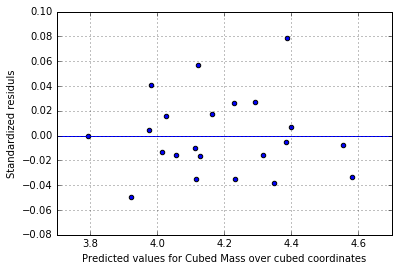

In [79]:
plt.scatter(x_axis, y_axis)
plt.xlabel("Predicted values for Cubed Mass over cubed coordinates")
plt.ylabel("Standardized residuls")
plt.axhline(0)
plt.grid()

In [80]:
x_axis = Mass_cube_predicted**3
y_axis = np.array(data2.Mass - x_axis)
y_axis

array([ 1.41614124,  0.42043176,  0.23206503,  1.48463295, -0.88478969,
       -0.45598516,  0.78701128, -0.51299514,  1.96008182, -2.24662466,
       -0.83972464,  0.90917451, -1.85057967, -1.76778143, -2.15061293,
       -0.77383494, -0.02993518, -0.61909915, -0.28121024,  2.95822706,
        4.60715934, -2.10394384])

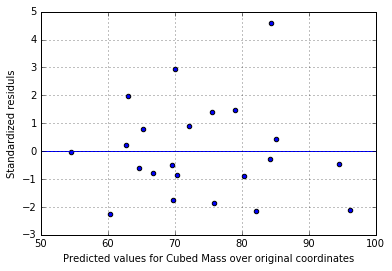

In [81]:
plt.scatter(x_axis, y_axis)
plt.xlabel("Predicted values for Cubed Mass over original coordinates")
plt.ylabel("Standardized residuls")
plt.axhline(0)
plt.grid()